In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
features = ["Age", "Fare", "Pclass"]
X = df[features].dropna()

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(X_scaled)

centers_pca = pca.transform(kmeans.cluster_centers_)

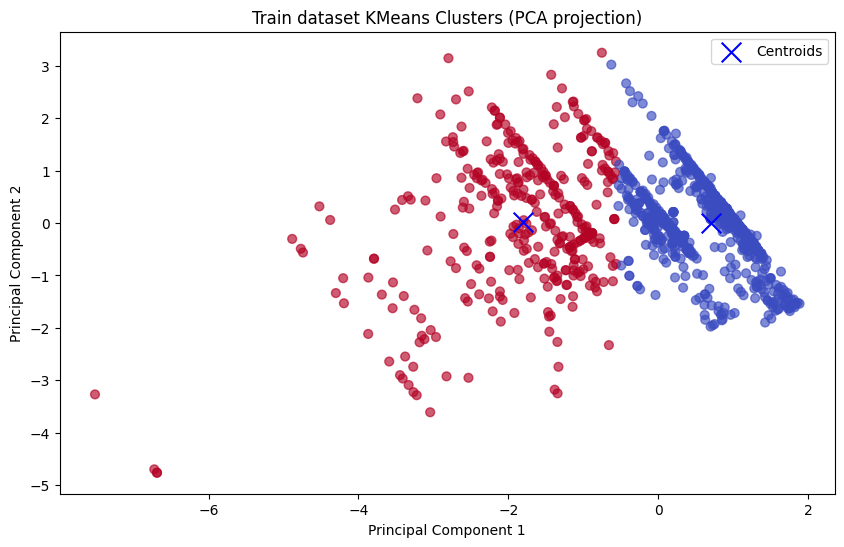

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=clusters, cmap="coolwarm" ,alpha=0.65, s=40)
plt.scatter(centers_pca[:,0], centers_pca[:,1],
            c="blue", marker="x", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Train dataset KMeans Clusters (PCA projection)")
plt.legend()
plt.show()